# Day 20

## Import things

In [26]:
import numpy as np
from typing import Tuple
from matplotlib import pyplot as plt

## Helper functions

In [27]:
def to_int(binary: str) -> int:
    """Convert strings that are binary numbers to integers.

    Args:
        binary (str): Binary number depicted as a string

    Returns:
        int: The integer number from the binary string
    """
    return int(binary, base=2)

def read_input(input_data: str) -> Tuple[np.array, np.array]:
    """Convert input data to two readable arrays of binary information for the algorithm and the image.

    Args:
        input_data (str): Raw input data from submarine system

    Returns:
        Tuple[np.array, np.array]: Returns a tuple of 2 numpy arrays, the algorithm (N,) and the image (X,Y).
    """
    to_binary = input_data.replace('.', '0').replace('#', '1')
    split = to_binary.split()
    algorithm = np.array([binary_digit for binary_digit in split[0]])
    image = np.array([[binary_digit for binary_digit in binary_row.replace('.', '0').replace('#', '1')] for binary_row in split[1:]], dtype=int)
    return (algorithm, image)
    
    

## Loading

In [28]:
example_input = """
..#.#..#####.#.#.#.###.##.....###.##.#..###.####..#####..#....#..#..##..###..######.###...####..#..#####..##..#.#####...##.#.#..#.##..#.#......#.###.######.###.####...#.##.##..#..#..#####.....#.#....###..#.##......#.....#..#..#..##..#...##.######.####.####.#.#...#.......#..#.#.#...####.##.#......#..#...##.#.##..#...##.#.##..###.#......#.#.......#.#.#.####.###.##...#.....####.#..#..#.##.#....##..#.####....##...##..#...#......#.#.......#.......##..####..#...#.#.#...##..#.#..###..#####........#..####......#..#

#..#.
#....
##..#
..#..
..###
"""

In [29]:
# with open('../data/day_20_puzzle_1') as f:
#     input_data = f.readlines()

In [30]:
# algorithm, image = read_input([row.replace('\n', '') for row in input_data if len(row) > 1])

In [31]:
input_data = """
##..#.####..#.#.##.#######.######.#####..#...##.###....#..#.##..#....#.#.##.#.#.#...###..###..#.#..#.#####.#.#.##..##.#.###.#..##.###.###...####.#####....#....#..#.#...#.#.#.#.#...#####...##..####.##.##...#.##.#####........#..#####..##.##..###########....#.##.#####.##..#####...#..#.#.##...#.#.#..#...####......#.#.####....##.#.##.####..##..##.#.......#...#.###########.....###.#######....##.#.#######..#.......###.##....#.#..#....##..#.###.#..#.###.###.##..##.#.#...#.#.....###.#.#....###..#.....##.#.#####.....

#.#.#.###...#####.#.###...#.#..##.#.#..#.#.#####.##......##..#.....#.#..#.##.#..##.##.#.#.#.##...#..
.#.##..#.##.#..#...##..##....##....###.##.#..##..............#####.#.###..#..####....##.##.#.#....#.
.##.##.###.##.#...#.#..#.###.##.####..#....#.#.####..##.####.###....##..###.#.#.....#..##.##.##.#...
..#.##.####.####..##..####.##.###..#.#..#..##.#..#..####.#.....####.#..#####...###.##...#.##...###..
###..##.#.#######.##....#.#.###..###..#..#####..#....##.##.###....#..#####.#..##.#...######.##..#.#.
....#.#.##..##.####..###..#####.#.#.##....#..#...##########..##.#...#..#.##.#####.#.###..#.#..######
.#....#.........##...#####.##.......#.###.#.###..###.#..##.###...####...........#..######...##..####
...#.#..###.###.#.#.##.#.###.#.######.#####.#...#.#...##..###.##.####.###..#..#.####.####..#.##.#.##
.#.#..####..#.#.#.##.......##..#..##..#..#.#.#..##..#..##.#.#.##..###....###.###.###..#....#.#..#.##
#......###.##.#..###.#.#.###.#...#..#.#.##.##...##..####..##.###..#...######...####..##.#####......#
.#...###.#.##.##...##......##..#.....###.###.#.#.####.###...#...#...#.##..#.##.###.#.#..#.....#####.
.##..#..#.#..#..#.##..#..###..##.##....#.#....#.####.##.###.#...###.#..###..###..#......##..#...##.#
..##..#..#..#..##.##...###.#.##.....#..###..##...##......#.#.#..#..#..#.#...#...#.........#.##.#...#
#.###.#..##..##...#.#...#......###.....##.######..#....#...##.###..#..####...##......#.##...##.##.#.
####....#.#..##.#.#.....##.##.#....#.##...###.#.#.#..##...#####.##.#.......##.#..#.##.....###.#.#..#
...#.#...#.......#.##.#...#####...##.##.#....###.......##...#.##.#.##...#.#.....#.#####.###.#####.#.
.###..#..##..####.##.#.###.###.###..#...###.#######...#...#.###..###..#..###.....##..#.###......##..
.#####.##.#..##....#.########..####.##...###..#.###..#..#.#####...#...##.#.##.#.....##.#..#####...##
...###......##.#.#.##...#....#.##..#.##.##..##.#.#.#####....#..##....##..##.#.##.....#..#.#..####..#
.#..###....#....##.#..#.##...#.#..#.#####.###.#.#..#.#..#.##.#....##.#.##...#####.#####...#...##.#..
#.#.#...#....#.#..#.##.#....#.#.###..##.##..#.#.#.....######.....#.#..#.###.#..##.##.#.###..#.###...
..#.#.#.#......###..##.#.##.##.###...###..#..####...#.#.##.###.#..#.#.#...##..##..##..#..####.##..##
...#.#.#...#..######.##.##.##...#..#..#..#..##.###.#....#..##..##.##.#......###.#.#..#....#.#...#...
...#.##...#.....###...#.##.###...####.#####....##.#....##.#...#.#..##..##.#..#####.......##.#...#.#.
##.#.#######.###...#.####..#..###.#.#..#.#.#.###..##.#.##.....#####..##.#...##...#....###.#.#...##..
##.#....##.##.#.###.......##..#.##..#.#......#..#.##.#..##.###..##...#...###...#..##.###...###....##
...#..#..#...##...#.###.#######.#.#....#..#.#####.#...#####....###.######....#.#..#.....##.#..##.##.
...#.##########..#.##..###....##.....####.##..###..#.#.####..###.###...###..##...#.#.###...#...#.#.#
.#...#.#.....#.##.#.#.##...#....#.....#.#.....#...##..##.#.##..#....#.##.#######.##.##....#...#..###
.#..#....#.#...##.##.##...#.#..##.##..#...#.###..#.##.###.#...###....####..#.##..####.#.#..#########
#.###.#..#####.##...##.##...#.#####...#..###....#.#..#..#.##..##.#..######..##.######.#..#.###..####
##..#.##.##..#.....#...#...#####.##...##.#.##.####..#.###.##.#.....##..#....#.#..###.#.##.#.#.###...
#.##..#.#.....#..#.##.###..###...##..#.#........##.###.#.........###.....#..#.##.##...###...#..###.#
#.....##.#.....#.#..###..#.#...#..#..###.#......###..#.######..#...##.#.#...#.#.#.#..##.##...##.##..
###...#....#..####.#..###..#.#.#..##.###..##.####...##.#..###.#.####.#..#....##...#.#...###..###..#.
..##..#..#...##.....##..#.##.##..#.#.####.##.###.#.#####......#.#..##.#...##.#.#.####..###....##...#
..##.#....#.####.....#.#.##....###..##..##..##....#...##...#.#.#.########...####....#..#.#.###.#.#..
###.#.##.###......####....##.##.#...###.#.....#....###.##.#######.##.####.##.#.###.####..#......#..#
...#..#..#.#....#.####...##.#..##.#####.###.#..#.##....#.##.#..####.#.#...######..###.#.######.##.#.
####.#....#....#...###....#.#.#.##.#..##.#.####..##..#...#......#######.#.#.#.##..#.....#..##.......
..##.#.#...#.##...#..#..##.#.##.......#.##.####..#.#.....#..#.....###.##.#.#...###..#..#...#.#.##.##
.#.########..####.#.###...##...#........#.####.####.#.#####.###..#####...##.##..#..#.#......#...###.
.#...#.###.#.#...#.#.#..####.##.#.####..#..#.##.....#####..#######.##....##...###..####.#.#####.....
###.#.######.#.#.#..#.#....##.....#...###.####.#.#..#.....##.##.###.#.####.....##.#....#...##..#.#..
##...#.....##.####.###.#.#.#.##.#.#.##.####....#.######....#....##......#....#..#.#..####.#.#.##.##.
..#.##.##...#.#.....#.##.##.######.####..#...#..###.##..##...#.####.##....##..#.###.#.####.###.#...#
#.##.##.##...#.....##.#.##.#.#####.#.#.....#..##...#.####...######..#....#.#.##..###.############..#
#.##.###...#..#.#.....####..#..#.#..#.#########...#..##.#.#...#...#.#.#...#...#.#..##.#.#..####.#..#
.##.##.##......##.#..###.#.##.####..#..##...###...##....#.##..#####.#.#.#...#.#.#..###..###..###..#.
.##.#####..#.#.#.####.#.#.##.##.....######.#..###..#####..##....#.#.#.##.##.#...#.#.#.#.####.##.##..
...#....#.##...#####.#.###.####...##.#...##.#.#..#.#...####......#####.#.##.#..#####.#...#..#...#...
#..#.##...#.#..#.###.#.#.#...#.##.##..#.##...###.######..#.##..###..#.#.###.##.#.###.....#..#.#..###
.###.#........##..##......##.#######.#.#..###...#..#.##..####.#.####..###...#..##.###.##.###.#...#..
###.###..##..##.#..#.##....#####.##.#....#..###..#..#.#...#.#.#......#.##..#####...###..##.#.....###
##.#..###...#.#..###.....###.###.#.#..#...#.#...###..#.....########.##......#...##..#.#.#.#..#.#.##.
#..##.#.#.##.####..##.###..#...#..#..###..##...#..#......#.#....##......####.#.###...##..###...#...#
..#..##..####..###..#####.#.#.##.##.##....##.#.#.##...#......#...#..###....####..#.##..#.###....#.##
###..#######...#...######.#######.##..##..###.....##..#...#..##..#######.....#..##..##..##..#.####..
..#.###.#.##...#.#.##.#.#.###..##.....###.###.#..####.#...##..##...#..#.###.##.##.####....#...##....
##.#.#...##.....#.#.#.##..##..####....#.#...#.#.#.#..#..###..###.#.#.###..#.###..#..###...##.......#
###...##..#.#.####..#..#...##..#..#.#.#.#...###.##.###.###.#####.#.....####..#####.###.##..###..#...
..###.#####.##...#.####....#.#...##...##....###......###...#.#.#.......###..#..#...#####.#..########
#.####....#.#.#.#.#.#.#..#.##...#.#.###.#.##.##..#..#.###.##.##....##.###...#..##.#.....##.###.##.#.
.#.#.##..#.#.##...##.####.#...#.#..##.#..##.#.##..##..#.####.##.#...##..###.###..###..#.#....###.##.
####.#...#....####.###.####...##.....#######.....###....##.#........#.###.....#.#.#.###.####.##.#.##
.#..#..#..####.#.##..##...###..###.###...######.###....##...#.##..#####.#.####.......#...#.##.#.....
.#..#....#...#####..#..#...#..#...##.#.##.#.##.#...#.##..##.####..#.###.###.#..##.###.......###.#...
.##.##.#..#...###.####.#.###.#...#..#.##.#..##.#.#.##..####.#####....##.###.###....#....#..##.###..#
..#..#..##.###...#.###.#.###...###....##.##.#.#..#..#.##.#.#.....#####..#.##.###.#.....#..#.#.######
#...##..###.###.#..#....#..#.##..##.###..#.#.#..##...#.##..#..#.#####.......#.##......##.#.#..#..#..
.#....####.##.###.##....#...###.#..#####.#..#..##....####.#...####.#..###...#....#.#..####..##....##
##..#####..#..#..#.#####.#.###..#....#..##.#...#.###..#..#####....##..##.#......##.###..#.#...#.###.
##.......#..##.#.#.##.#...#.########.#.#.##..##.#..###.....#.#..###...##..#......##.##.##......#..##
.##...##.#.#.....#.#.#.#....###..#..##...#.#.#.##.####.##.##.##.....##.#.....#.#.##..#.#.####.#..##.
..#..#....###.....#.###...###.###...##....##.#.#.##....#..######...#.##.#.#...##.#....##########.###
.....#.#.#.##.#.#.....#..#.#.#..####.##.#...#.#.....#####.###.#...#...#....###.#.......#.#..#...##..
.##..###.#....#..#.##.#.#.#..#..#.##.....#####..##.....##.##....#...#..##..#..#.....###..#...##.#..#
#.#.#..#.#...#.#.#.#...#..#.#.###.#.....#...#...#.###..######.#..###..####..####...##..#.....#.####.
#..##........#.#.##.#.##.#.#####..#....#####.####...#....#.#..####.#..###.#.###..##..#....##.#...#.#
..#....#....#....#.#.####......#.##...###..###.#.#..#.#.#.###..#.#.###.....#..###..##..#.##..#.#..##
#...#..#.###.#....#.#.#.#..#.####..#####..###.....##..#.###..#.##.#####.#.#....###.###..#.##.###..#.
#####.###.#.#.####..#.###.##..#.#.#..#........#########.##.#.#.#..##.#...#..#...#.##....#..##.##.#.#
#.##.....#.##.#..##.....####.##..#..#...#.#..#.#######..#.##.#..#.##...###.###....###..#.##.##.####.
.#....##########..#.#..###..#.#.#.#...#..#.#..###..##....######.###....#...##...#...#..###.#.#...###
#.#.#..#.##.....##..####.###.#.###.#..#....#.#...#..##.#.#.##...#..#.......#...#.....##.##.##...#...
#....#...#..##..............##.###.#.#####.##..#########..#.#..##.###..##.##..#.##.##..##..#...###.#
##...#.####...##.....##.##....##.######.##.#.##.####..##..#####..#..#.#.###.....#..##..#.#...####...
#..#.####.#....##..#.###.##.#.#.#.#...##.##.#.####......###.#.####.#####...##.#.#.##.#..######..#..#
..##...##.#.##.##.#.#..#....#.##.##.#..###...######.####.#......#..#.#..#.#####.....#.#.#..#......#.
#......#.###.#......###....##.##.#.#...#...##.#.#.######..#.##.####..#..#...#.##.###....#......####.
.#.#.#####.###.##.##......#......##.#.....##..#.###..#.##....##.#.##.#####..##.##..#####.#..#...##.#
##.#.#.#..#.###.##.#.#....##.#.##.....#.#.#.#..#...#.....#.#.#.#.#####....#######.#..#..##..##.###.#
..#.##..####.#.......#....######...####.#.#.###.#...######.#....##.#.##.##.###.#..#...##...##..#....
.#.##.###..###........##.##.####.####.#...#.##....#####.##..####...##.##..#.#.####.#####....##....#.
#.##.#.#.##......#.#####.#.#..###....#...#...#..##..##.#.#.####..###.#.#..######.###.......#..#.####
..##.#.#...##...#.....#......#..##.#.##.###.#.###..#..#.#.####.##.#.####.#.####.#.#..###.##.###..#.#
#........#.#..#.....##..#...##..##..##..#.##..##.#.####..####.#.#.#####..###.#.....#.#....#..#..###.
#..##..#.######.....##..#.##..#..###.####.#.#....#.#.........#####.####..##.####.##..#.#..#..#.###..
##.##..##.####..#.#...#..#..#..##.....##..#...#.###..#.............##.#...###....##.####.#.###..#..#
#..#.#.###..###....#####.#.#.#..#.##.#.##...##..###.##..###....#.###.##..#.#.#.#######.##.#.#.#..#..
"""

In [32]:
algorithm, image = read_input(input_data)

In [33]:
image.shape

(100, 100)

In [34]:
(image.shape[0] + 110) % 3

0

In [35]:
# 27 % 3 == 0
# 27 - 5 == 22 
# 22 / 2 == 11
# ((11, 11),(11, 11))

In [36]:
padded_image = np.pad(image, ((55, 55),(55, 55)))
padded_image.shape

(210, 210)

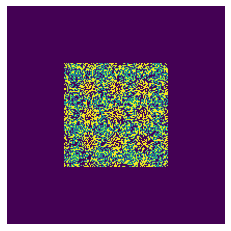

In [37]:
plt.imshow(padded_image)
plt.axis(False)
plt.show()

## Enhance!!!

In [38]:
enhance_times = 50

enhanced_image = padded_image.copy()
tmp_image = np.zeros(enhanced_image.shape, dtype=int)

for enhance in range(enhance_times):
    for row in range(1, enhanced_image.shape[0] - 1):
        for col in range(1, enhanced_image.shape[1] - 1):
            top_row = enhanced_image[row - 1, col - 1 : col + 2]
            middle_row = enhanced_image[row, col - 1 : col + 2]
            bottom_row = enhanced_image[row + 1, col - 1 : col + 2]

            binary_string = ''.join(
                np.concatenate(
                    (
                        top_row,
                        middle_row,
                        bottom_row
                    ),
                    dtype=str
                )
            )

            # print(row, col, binary_string, to_int(binary_string))
            replacement_value = algorithm[to_int(binary_string)]
            tmp_image[row, col] = replacement_value
            # print(enhanced_image[row,col])
    enhanced_image = tmp_image.copy()
    tmp_image = np.zeros(enhanced_image.shape, dtype=int)


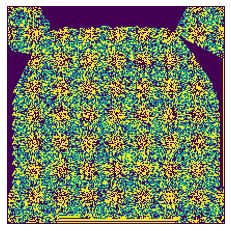

In [39]:
plt.imshow(enhanced_image)
plt.axis(False)
plt.show()

In [40]:
enhanced_image.sum()

20511